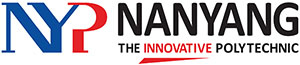

# Practical: Loss Functions



## Objectives

- Write loss functions for regression and classification
- Understand how different loss functions are represented
- Implement loss functions in simple linear models for regression and classification
- Generate training data and train models
- Track loss per iteration and plot appropriate graphs

## Introduction

In order to optimize machine learning algorithms, we will need some way to evaluate the outcomes. This is where loss functions come into play. Loss functions measure the distance between model outputs and truth values and are required to tell TensorFlow how good or bad the predictions are compared to the desired result. In this practical, we will demonstrate how to write and plot loss functions. We will also implement these loss functions in simple linear models and optimize the models such that the loss function is minimized.

## Step 1 - Import Libraries

Import the required libaries as follows

```python
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
```

In [4]:
# insert code here

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Step 2 - Defining loss functions for regression

The L2 norm loss is also known as the Euclidean loss function. It is just the square of the distance to the target. The L1 norm loss is also known as the absolute loss function. Instead of squaring the difference, we take the absolute value. The L1 norm is better for outliers than the L2 norm because it is not as steep for larger values.

You can try writing the functions for calculating L2 and L1 loss. *Note: We will be only having one target value (0, see below), therefore you can ignore the summation term in the formula.*

<details>
    <summary><strong>Click here to see codes</strong></summary>

```
def l2(y_true, y_pred):
 return tf.square(y_true - y_pred)

def l1(y_true, y_pred):
 return tf.abs(y_true - y_pred)

```

</details>

In [ ]:
# insert code here


## Step 3 - Plotting regression loss functions

To better understand how loss functions work, we can plot them on a graph. For this, we will create some prediction values (500 values between -1 and 1) and a target (0). We can then calculate the loss for all the predictions using either the l1 or l2 functions defined earlier and plot the losses on a graph.

<details>
    <summary><strong>Click here to see codes</strong></summary>

```
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

funcs = [(l2, 'b-', 'L2 Loss'),
 (l1, 'r--', 'L1 Loss')]

for func, line_type, func_name in funcs:
 plt.plot(x_vals, func(y_true=target, y_pred=x_vals), line_type, label=func_name)
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

```
</details>

In [6]:
# insert code here

x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)
print(target)

funcs = [(l2, 'b-', 'L2 Loss'),
 (l1, 'r--', 'L1 Loss')]

for func, line_type, func_name in funcs:
 plt.plot(x_vals, func(y_true=target, y_pred=x_vals), line_type, label=func_name)
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

tf.Tensor(0.0, shape=(), dtype=float32)


NameError: ignored

## Step 4 - Defining loss function for binary classification

Classification loss functions are used to evaluate loss when predicting categorical outcomes. In this case, the output of our
model for a class category is a real-value number between 0 and 1. A cutoff (0.5 is commonly chosen) is used to classify the outcome as being in that category if the number is above the cutoff.

For the binary case where we are predicting two classes (0 or 1), we normally use the cross entropy formula from information theory. Try writing the function to calculate cross entropy loss for the binary case. *Note: You can ignore the (1/n) term as well as the summation term in the formula as we will only have only a single target value for simplicity.* 

<details>
    <summary><strong>Click here to see codes</strong></summary>

```

def xentropy(y_true, y_pred):
 return (- tf.multiply(y_true, tf.math.log(y_pred)) - tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))

```

</details>

In [2]:
# insert code here
def xentropy(y_true, y_pred):
 return (- tf.multiply(y_true, tf.math.log(y_pred)) - tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))

## Step 5 - Plotting binary classification loss functions

Similar to regression, we can plot the binary classification loss function.

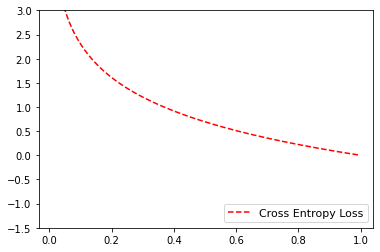

In [8]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
funcs = [(xentropy, 'r--', 'Cross Entropy Loss')]
for func, line_type, func_name in funcs:
 plt.plot(x_vals, func(y_true=target, y_pred=x_vals),
 line_type, label=func_name)
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## Implementing loss functions in simple linear models (regression)

## Step 1 - Generating data

Let us now implement this loss function in some simple linear models and change the variables to minimize the loss function. Lets start with a regression problem. First we will generate some data with some noise.

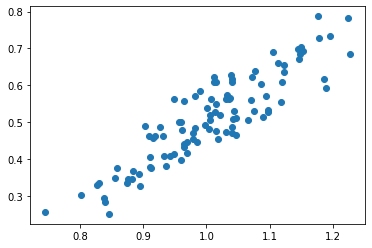

In [22]:
import numpy as np
np.random.seed(0)
x_vals = np.random.normal(1, 0.1, 100).astype(np.float32) #draw data from normal distribution
y_vals = (x_vals * (np.random.normal(1, 0.05, 100)) - 0.5).astype(np.float32)
plt.scatter(x_vals, y_vals)
plt.show()

## Step 2 - Defining operation and loss function

We will run the numbers through one operation, which will be to multiply them by a weight tensor and then
add a bias tensor. For this, the loss function will be the L2 norm between the output and the target. Let us define some functions to do these.

In [108]:
def my_output(X, weights, biases):
 return tf.add(tf.multiply(X, weights), biases)

def loss_func(y_true, y_pred):
 #return tf.reduce_mean(tf.square(y_pred - y_true))
 return (tf.square(y_pred - y_true))

## Step 3 - Optimizer
We will be using standard gradient descent for optimization. This can be implemented with the tf.optimizers.SGD TensorFlow function. We need to also specify the learning rate. If our learning rate is too high, our algorithm might overshoot the
minimum, but if our learning rate is too low, our algorithm might take too long to converge. We will discuss more about optimization in a future topic.

In [109]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)
#my_opt = tf.optimizers.SGD(learning_rate=0.05)

## Step 4 - Initialize variables
Now we can initialize our network variables (weights and biases) and set a recording list
(named history) to help us visualize the optimization steps

In [110]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
hist = list()

## Step 5 - Perform training and backpropagation

The final step is to loop through our training algorithm and tell TensorFlow to train many times.
We will do this 100 times and print out results every 25th iteration. To train, we will select a
random x and y entry and feed it through the graph. TensorFlow will automatically compute
the loss, and slightly change the weights and biases to minimize the loss.

In the loops, tf.GradientTape() allows TensorFlow to track the computations and calculate the gradient with respect to the observed variables. Once you've completed the monitoring, you can compute the gradient of a target with respect to a list of sources (using the command tape.gradient(target, sources)) and get back an eager tensor of the gradients that you can apply to the minimization process. We will discuss this more in a future topic. 

The operation is automatically concluded with the updating of your sources (in our case, the weights and
biases variables) with new values.

In [112]:
#for i in range(10000):
for i in range(100):
 rand_index = np.random.choice(100)
 rand_x = [x_vals[rand_index]]
 rand_y = [y_vals[rand_index]]
 with tf.GradientTape() as tape:
   predictions = my_output(rand_x, weights, biases)
   loss = loss_func(rand_y, predictions)
 hist.append(loss.numpy())
 gradients = tape.gradient(loss, [weights, biases])
 my_opt.apply_gradients(zip(gradients, [weights, biases]))
 if (i + 1) % 25 == 0:
   print(f'Step # {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
   print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [0.16183439] Biases: [0.5067717]
Loss = 0.06110404431819916
Step # 50 Weights: [0.16604994] Biases: [0.480188]
Loss = 0.007219819352030754
Step # 75 Weights: [0.15795271] Biases: [0.49331987]
Loss = 0.10762404650449753
Step # 100 Weights: [0.10058385] Biases: [0.5077111]
Loss = 0.01713753119111061


In [87]:
print(weights)
print(biases)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.126223], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.49685338], dtype=float32)>


## Step 6 - Plot loss per iteration

A plot will reveal how the optimization proceeded

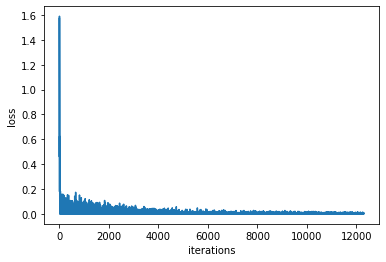

In [73]:
plt.plot(hist)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

## Implementing loss functions in simple linear models (classification)

## Step 1 - Data generation
For classification, we will generate 100 numbers from two normal distributions, N(-3,1) and N(3,1). All the numbers from N(-3, 1) will be in target class 0, and all the numbers from N(3, 1) will be in target class 1.



[-1.2359476  -2.5998428  -2.021262   -0.7591068  -1.132442   -3.977278
 -2.0499115  -3.1513572  -3.1032188  -2.5894015  -2.8559563  -1.5457265
 -2.2389622  -2.878325   -2.5561368  -2.6663256  -1.5059209  -3.2051582
 -2.6869323  -3.8540957  -5.55299    -2.3463814  -2.1355639  -3.742165
 -0.73024535 -4.4543657  -2.9542415  -3.1871839  -1.4672208  -1.5306412
 -2.8450525  -2.6218374  -3.8877857  -4.9807963  -3.347912   -2.843651
 -1.7697093  -1.7976202  -3.3873267  -3.3023028  -4.048553   -4.4200177
 -4.70627    -1.0492246  -3.5096521  -3.4380744  -4.252795   -2.2225096
 -4.613898   -3.2127402   2.1045334   3.3869026   2.4891949   1.8193678
  2.9718177   3.4283319   3.066517    3.3024719   2.3656778   2.6372588
  2.3275394   2.640447    2.1868536   1.2737174   3.177426    2.5982192
  1.3698016   3.4627821   2.0927017   3.0519454   3.7290905   3.128983
  4.1394005   1.7651742   3.4023416   2.3151898   2.1292028   2.4211504
  2.6884475   3.0561655   1.8348502   3.9008265   3.4656625   1.4637

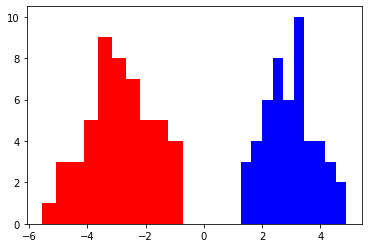

In [127]:
np.random.seed(0)
x_vals = np.concatenate((np.random.normal(-3, 1, 50),np.random.normal(3, 1, 50))).astype(np.float32)
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50))).astype(np.float32)
print(x_vals)
print(y_vals)
plt.hist(x_vals[y_vals==1], color='b')
plt.hist(x_vals[y_vals==0], color='r')
plt.show()

## Step 2 - Define loss function and model

The model to differentiate these classes will again be a linear model optimized accordingly to the binary cross-entropy loss function

In [133]:
def loss_func(y_true, y_pred):
  return  (- tf.multiply(y_true, tf.math.log(y_pred)) - tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))

In [134]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history = list()

## Step 3 - Train the model and plot the loss

Finally, we loop through a randomly selected data point several hundred times and update the weights and biases variables accordingly. As we did before, every 25 iterations we will print
out the value of our variables and the loss. We will also track and print the loss per iteration.

In [137]:
for i in range(100):
 rand_index = np.random.choice(100)
 rand_x = [x_vals[rand_index]]
 rand_y = tf.convert_to_tensor([y_vals[rand_index]])
 with tf.GradientTape() as tape:
   predictions = my_output(rand_x, weights, biases)
   predictions=tf.nn.sigmoid(predictions)
   loss = loss_func(rand_y, predictions)
 history.append(loss.numpy())
 gradients = tape.gradient(loss, [weights, biases])
 my_opt.apply_gradients(zip(gradients, [weights, biases]))
 if (i + 1) % 25 == 0:
   print(f'Step {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
   print(f'Loss = {loss.numpy()}')

Step 25 Weights: [0.9456199] Biases: [0.27701053]
Loss = [0.06128651]
Step 50 Weights: [1.0297093] Biases: [0.2617278]
Loss = [0.11103141]
Step 75 Weights: [1.0947071] Biases: [0.2422552]
Loss = [0.0505158]
Step 100 Weights: [1.1613212] Biases: [0.22526734]
Loss = [0.05842879]


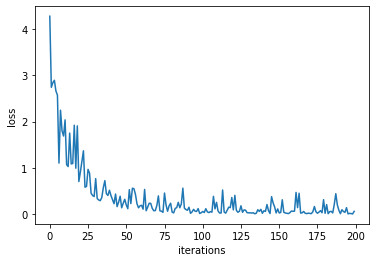

In [138]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

## Step 4 - Testing model

Let us try to test the model with some values

In [141]:
xtest=-5
predictions = my_output(xtest, weights, biases)
predictions=tf.nn.sigmoid(predictions)
print(predictions)

tf.Tensor([0.00375338], shape=(1,), dtype=float32)


# Optional


So far we have predicted a single class from two classes. We can extend the techniques to predict a single class from many classes. This requires the use of the multi-class cross entropy loss function and the softmax activation function (we will see this in future sessions). The full output of a neural network for predicting 1 out of 10 possible classes looks like this: 

```
{
'logits': array([ -0.77470624, -10.049942  ,  -3.3330064 ,  -5.165324  ,
        -2.1594608 ,   7.6966696 ,  -2.0876062 ,  11.415269  ,
         1.4392091 ,  12.48665   ], dtype=float32), 
'probabilities': array([1.2884091e-06, 1.2074521e-10, 9.9769579e-08, 1.5967350e-08,
       3.2259842e-07, 6.1535449e-03, 3.4663171e-07, 2.5356689e-01,
       1.1790841e-05, 7.4026573e-01], dtype=float32), 
'class_ids': array([9], dtype=int64), 
'classes': array([b'9'], dtype=object)
}
```

So what does _logits_ and _probabilities_ mean?

Since our output has 10 possible classes, the classifier uses the softmax activation function for generating the output. Based on the logits values, we can calculate the probabilites using the softmax equation as follows:

$$f(x_i)=\frac{e^{x_i}}{\sum_{j=0}^k e^{x_j}}$$

In the example above, for class 9:

$$f(x_9)=\frac{e^{12.48665}}{e^{-0.77470624}+e^{10.049942}+...+e^{12.48665}}=0.74026573$$

Looking at the "classes", we see that the value is 9, so that is the class being predicted. The probabilities array list the probability of each of the classes. We can see that the probability of being class 9 is the highest at 74.03% hence it is selected as the predicted class.


## Conclusion

In this practical, we have learnt how to write and plot loss functions with Tensorflow. We have also implemented appropriate loss functions for regression and classification and tracked the loss per iteration for simple models.